In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset('titanic')

In [4]:
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
df.drop(columns=['deck','embarked','alive','class','adult_male'],inplace=True)

In [7]:
df['age'].fillna(df['age'].median(),inplace=True)

In [8]:
df.dropna(subset=['embark_town'],inplace=True)

In [9]:
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
embark_town    0
alone          0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   who          889 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        889 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 70.3+ KB


In [ ]:
df['age']=df['age'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   who          889 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        889 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 70.3+ KB


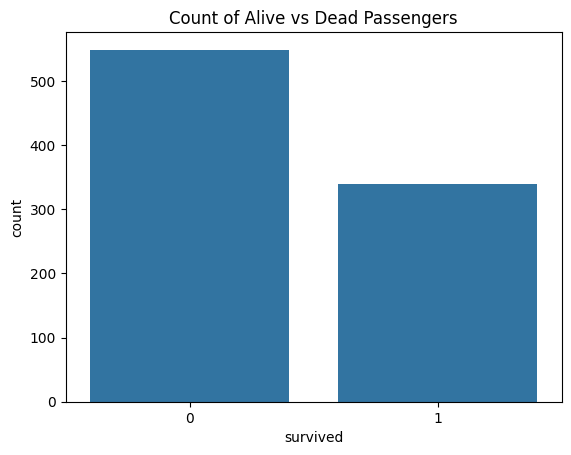

In [13]:
sns.countplot(data=df,x='survived')
plt.title('Count of Alive vs Dead Passengers')
plt.show()

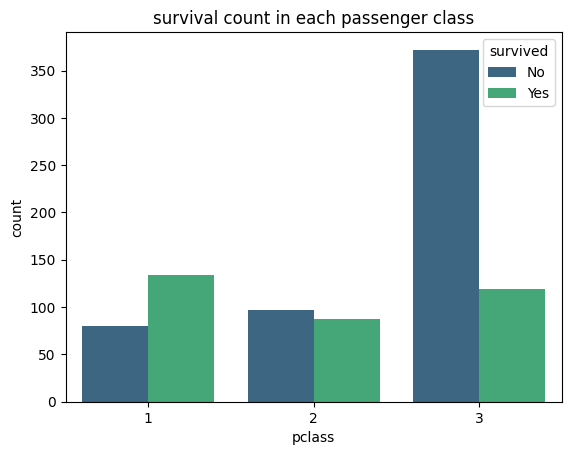

In [ ]:
#Did money buy survival?
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='pclass',hue='survived',palette='viridis')
plt.title('survival count in each passenger class')
plt.legend(title='survived',labels=['No','Yes'])
plt.show()

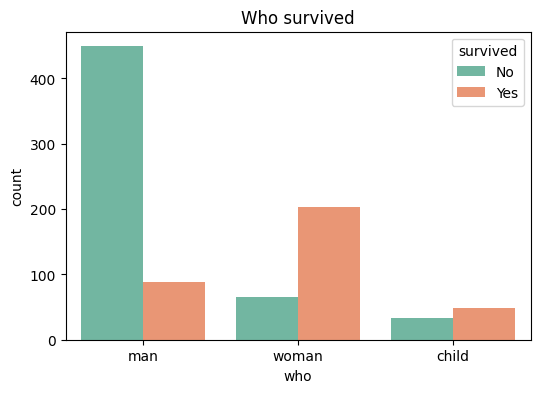

In [19]:
#who survived?
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='who',hue='survived',palette='Set2')
plt.title('Who survived')
plt.legend(title='survived',labels=['No','Yes'])
plt.show()

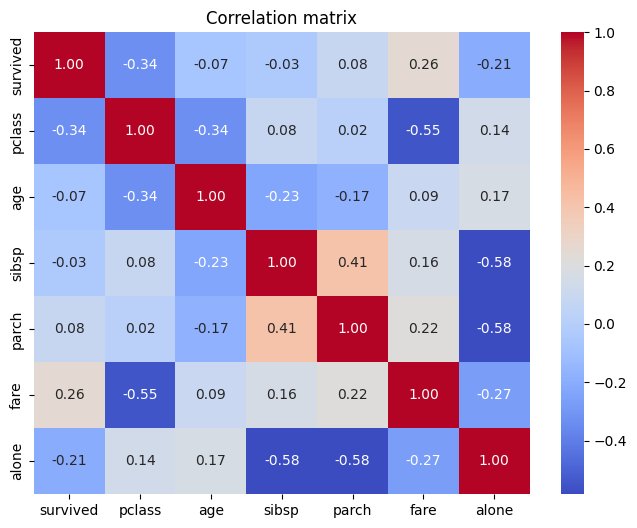

In [29]:
corr =df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation matrix')
plt.show()